In [1]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [2]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [3]:
import StateUtilities as SU

In [4]:
import visualization_helper_v2 as vh

In [5]:
fig_width = 16

In [6]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/b002/",
            "../checkpoints/b003/",
            "../checkpoints/b004/"]

In [7]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [8]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.
No Q-value list found for ../checkpoints/b002/.
No Q-value list found for ../checkpoints/b003/.
No Q-value list found for ../checkpoints/b004/.


In [9]:
vh.get_arguments_overview(dirnames)

,b001,b002,b003,b004
ts_per_hour,1,12,1,1
lambda_rwd_energy,1e-05,0.0001,1e-05,1e-05
rulebased_setpoint_unoccu_mean,22.0,22.0,23.0,23.0
rulebased_setpoint_unoccu_delta,8.0,8.0,8.0,1.0
rulebased_setpoint_occu_mean,22.0,22.0,23.0,24.0


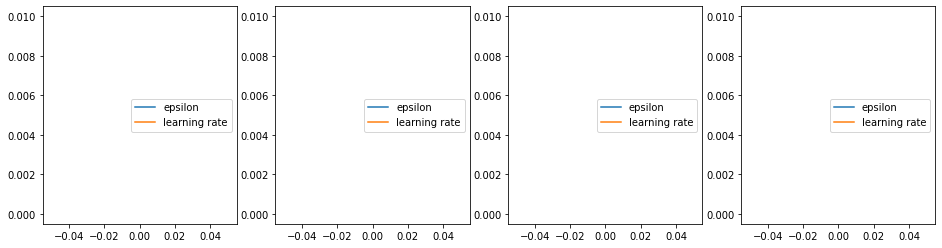

In [10]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

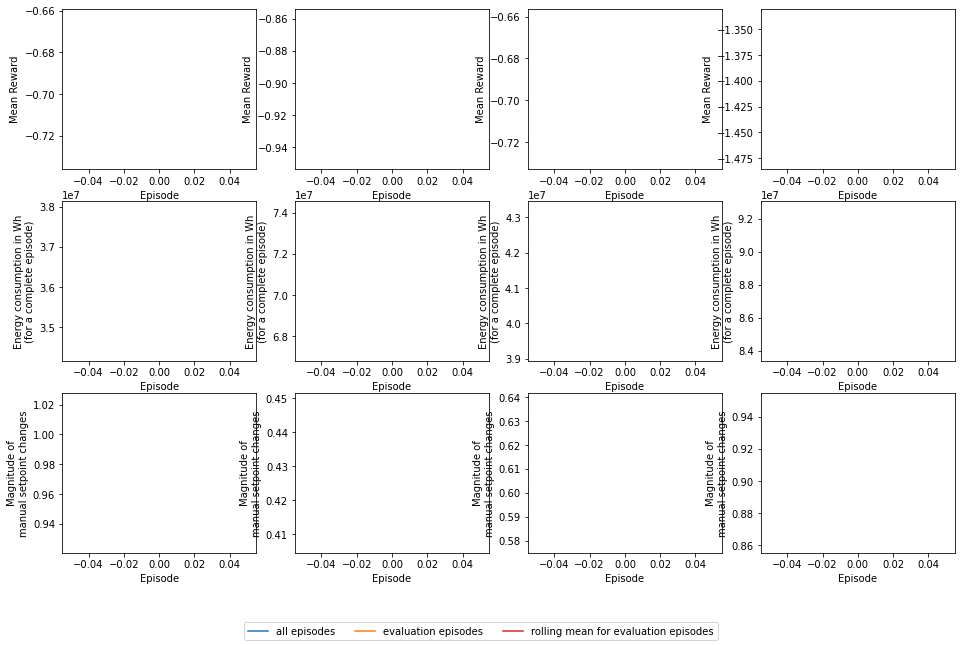

In [11]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

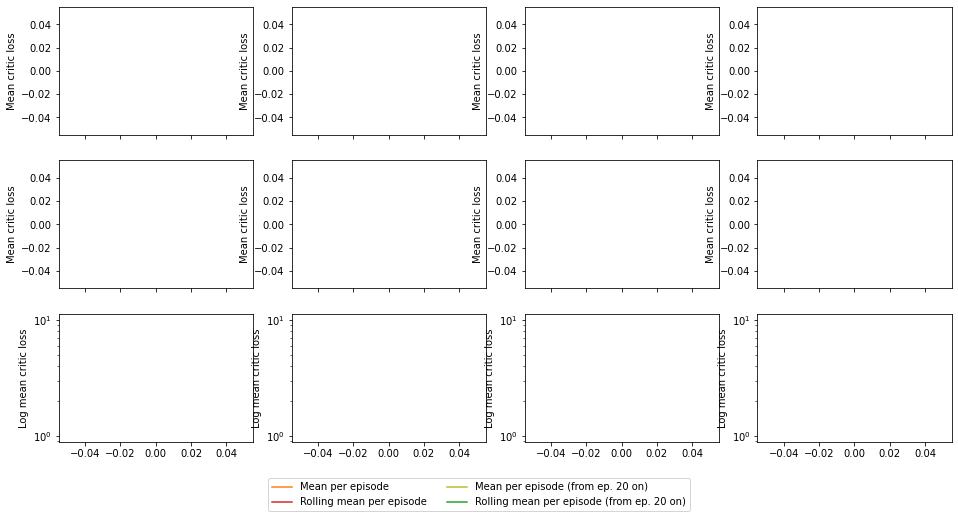

In [12]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

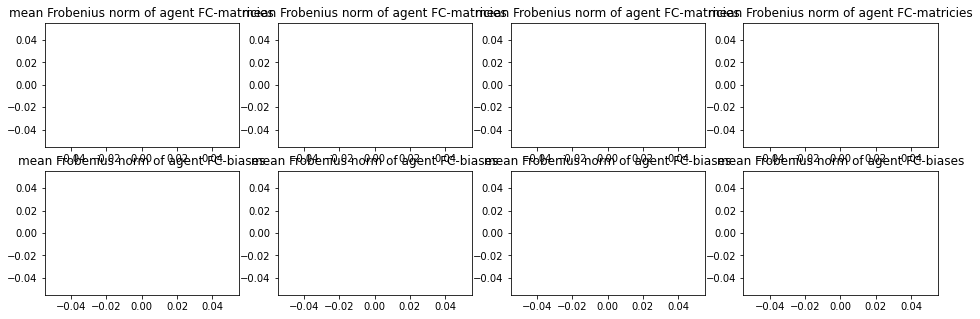

In [13]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [14]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:      0
Last available evaluation episode for dfs2:      0
Last available evaluation episode for dfs3:      0


<h3>Details for one week</h3>

In [15]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [16]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [17]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   36152.82 kWh; Numer of setpoint changes: 700.4556998153214
For episode     0: Energy consumption:   70683.23 kWh; Numer of setpoint changes: 3697.818079259044
For episode     0: Energy consumption:   41199.71 kWh; Numer of setpoint changes: 437.41459135999145
For episode     0: Energy consumption:   88222.14 kWh; Numer of setpoint changes: 650.7509601859916

Mean values for episode ...
...     0: Reward: -0.69766 kWh; Setpoint change magnit.:  0.97421; Energy cons.: 50282.08407
...     0: Reward: -0.90380 kWh; Setpoint change magnit.:  0.42804; Energy cons.: 8181.87637
...     0: Reward: -0.69469 kWh; Setpoint change magnit.:  0.60837; Energy cons.: 57301.40291
...     0: Reward: -1.40803 kWh; Setpoint change magnit.:  0.90508; Energy cons.: 122701.17009


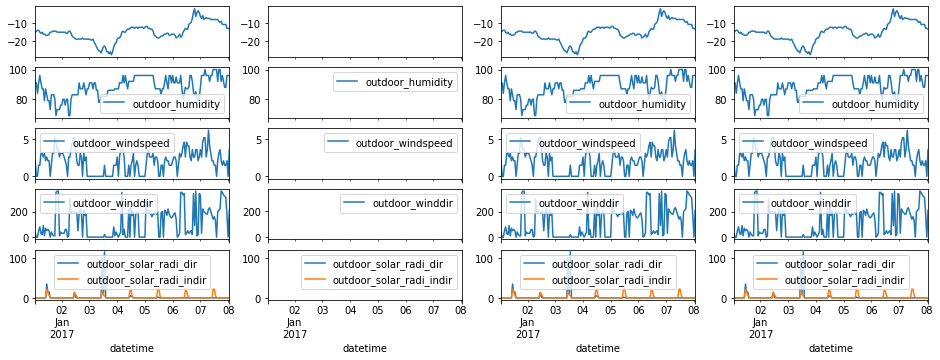

In [18]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

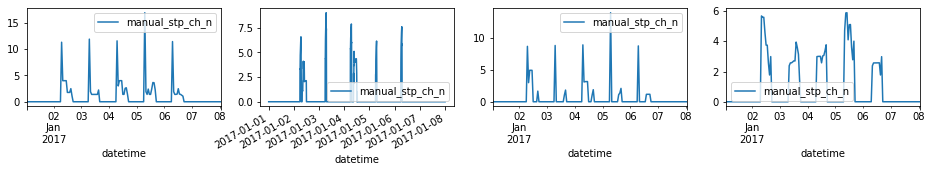

In [19]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

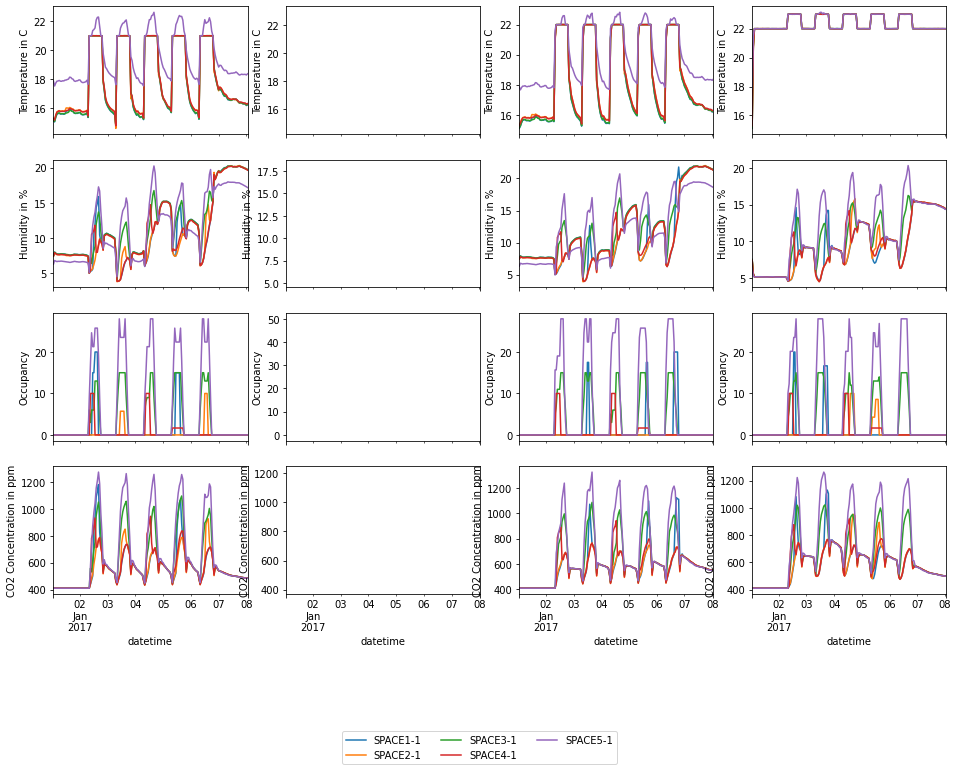

In [20]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [21]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: [0 1 2 3 4] 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: [0 1 2 3 4] 



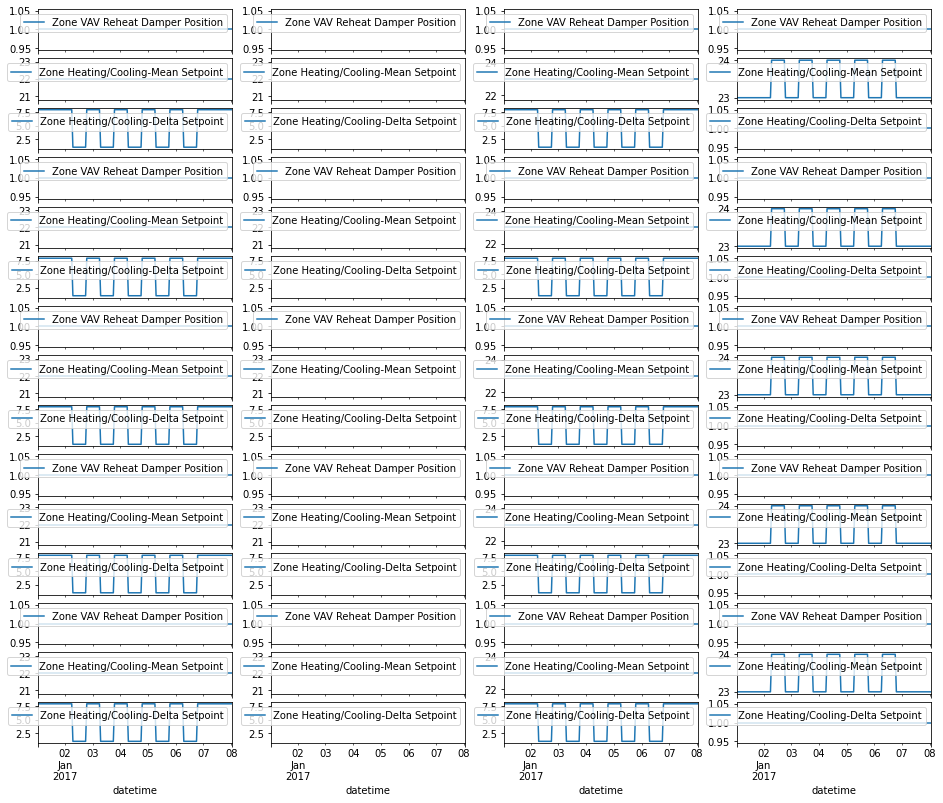

In [22]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

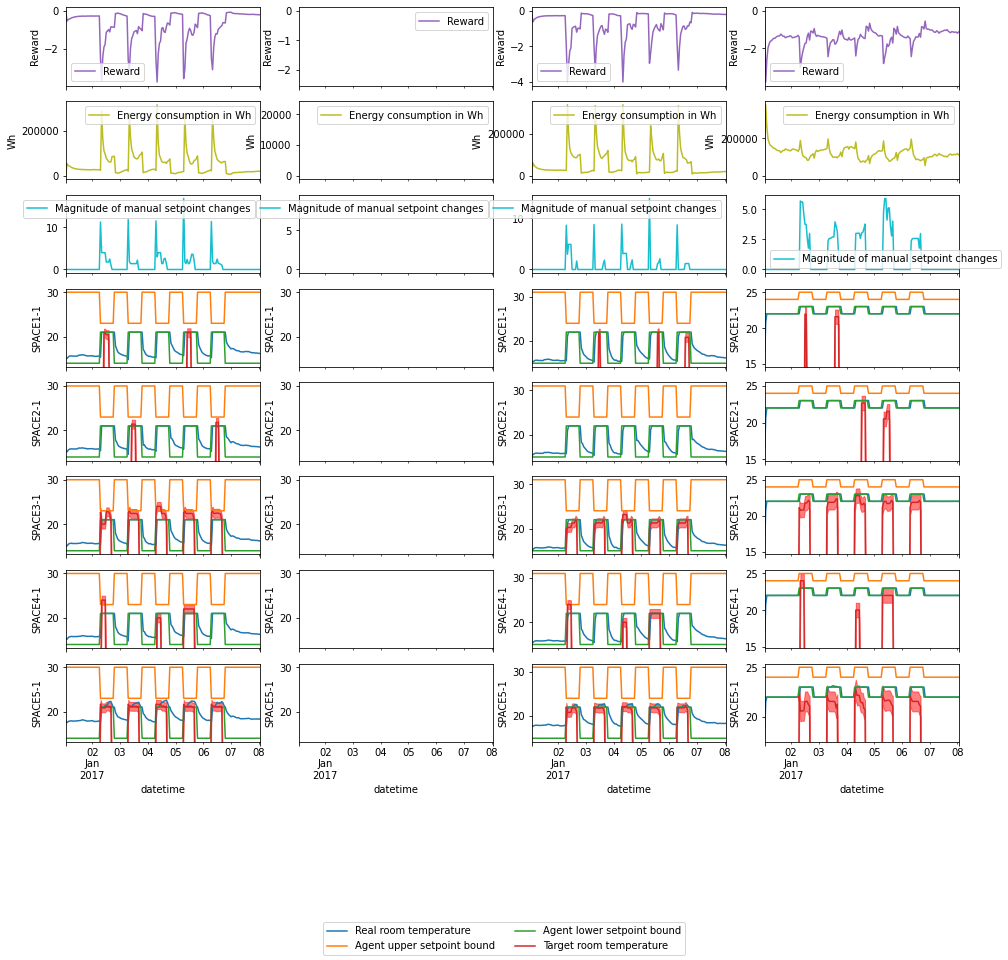

In [23]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [24]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [25]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

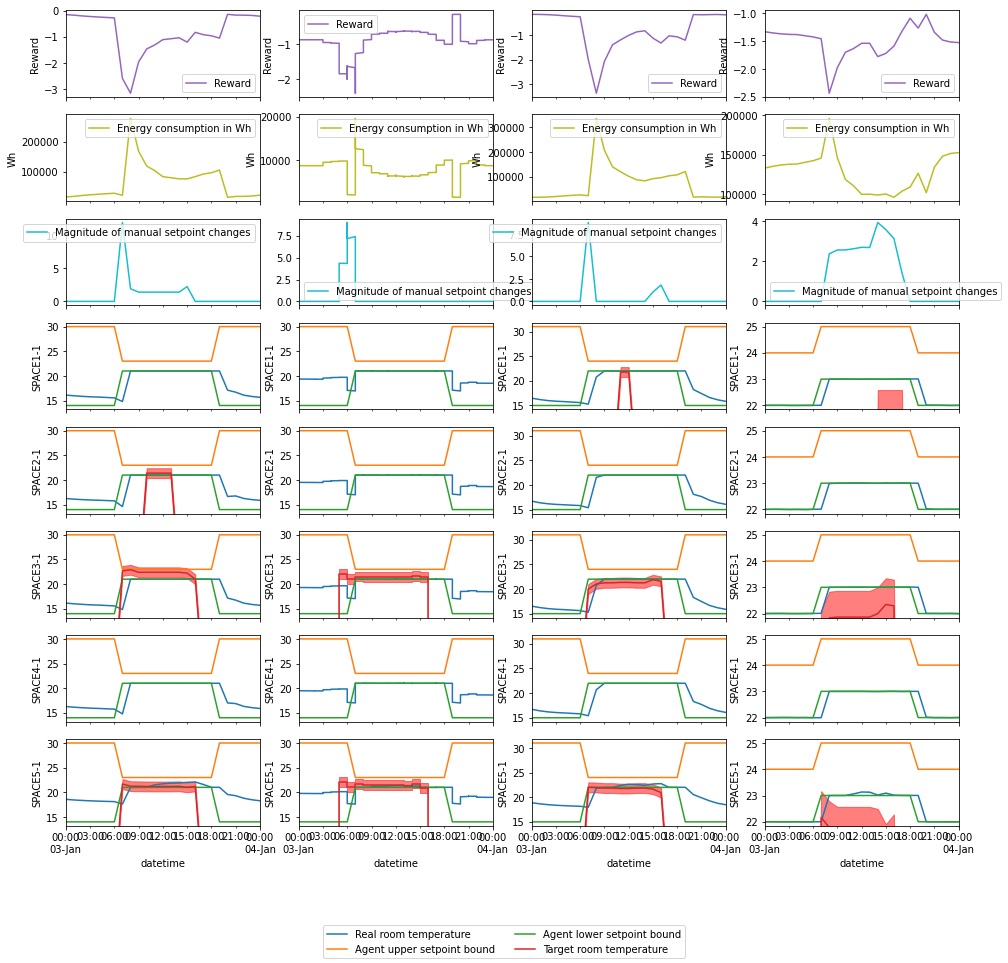

In [26]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [27]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [28]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  49473.6 Wh, mean reward = -0.6858
For plot number 2, mean energy consumption =   8189.7 Wh, mean reward = -0.9012
For plot number 3, mean energy consumption =  56287.2 Wh, mean reward = -0.6798
For plot number 4, mean energy consumption = 122143.9 Wh, mean reward = -1.3980


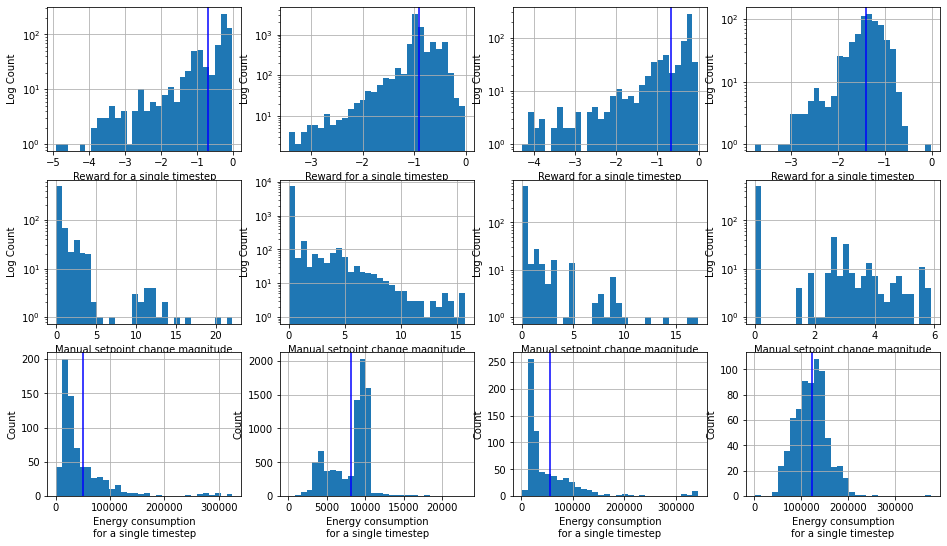

In [29]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

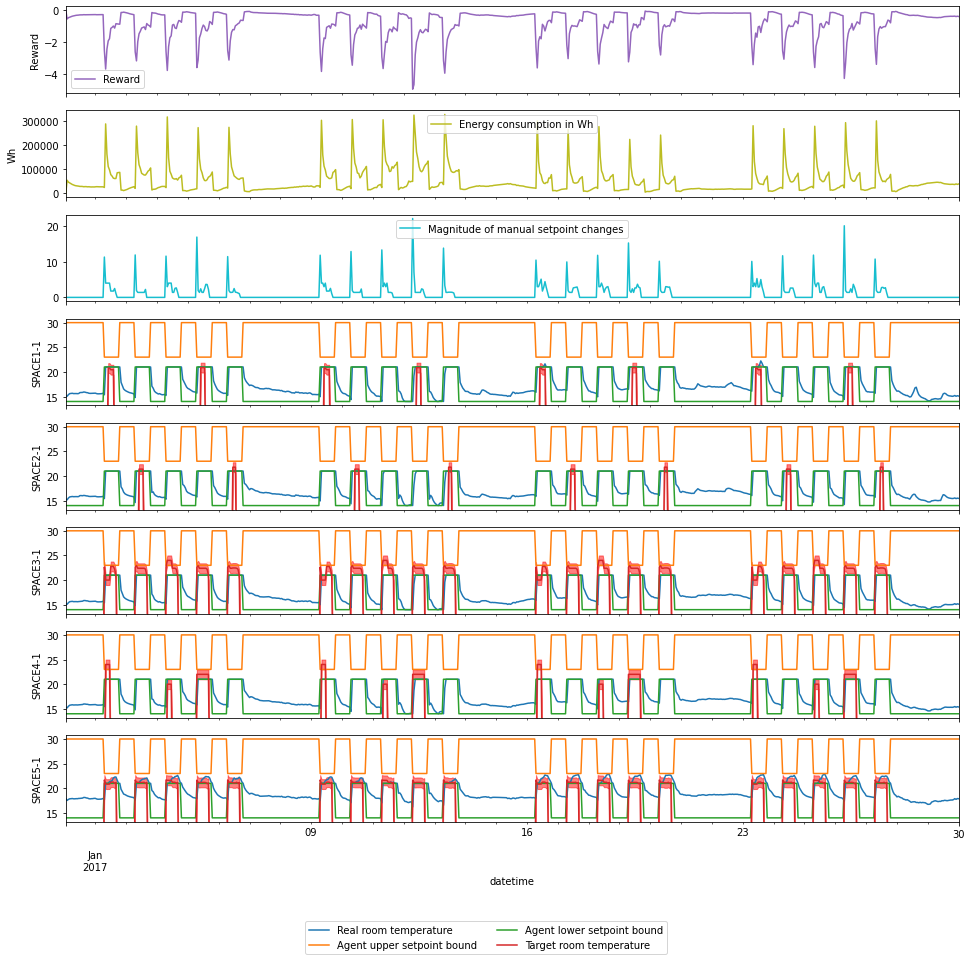

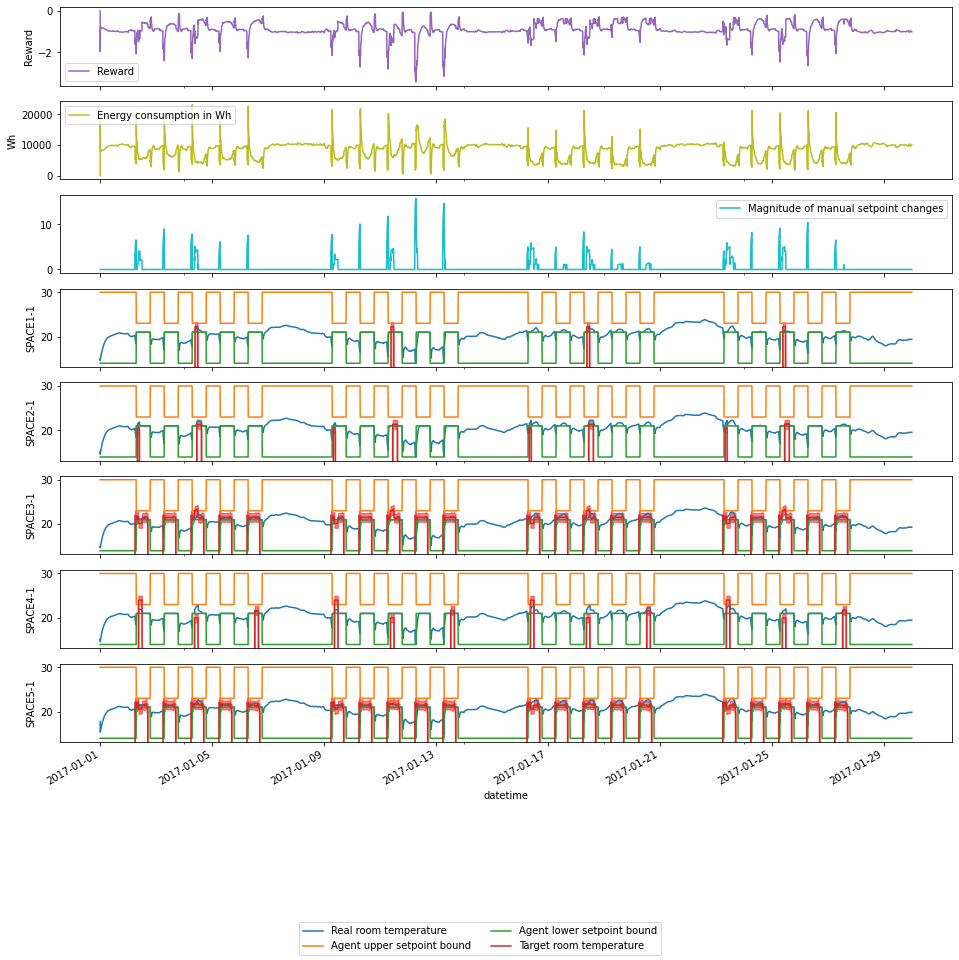

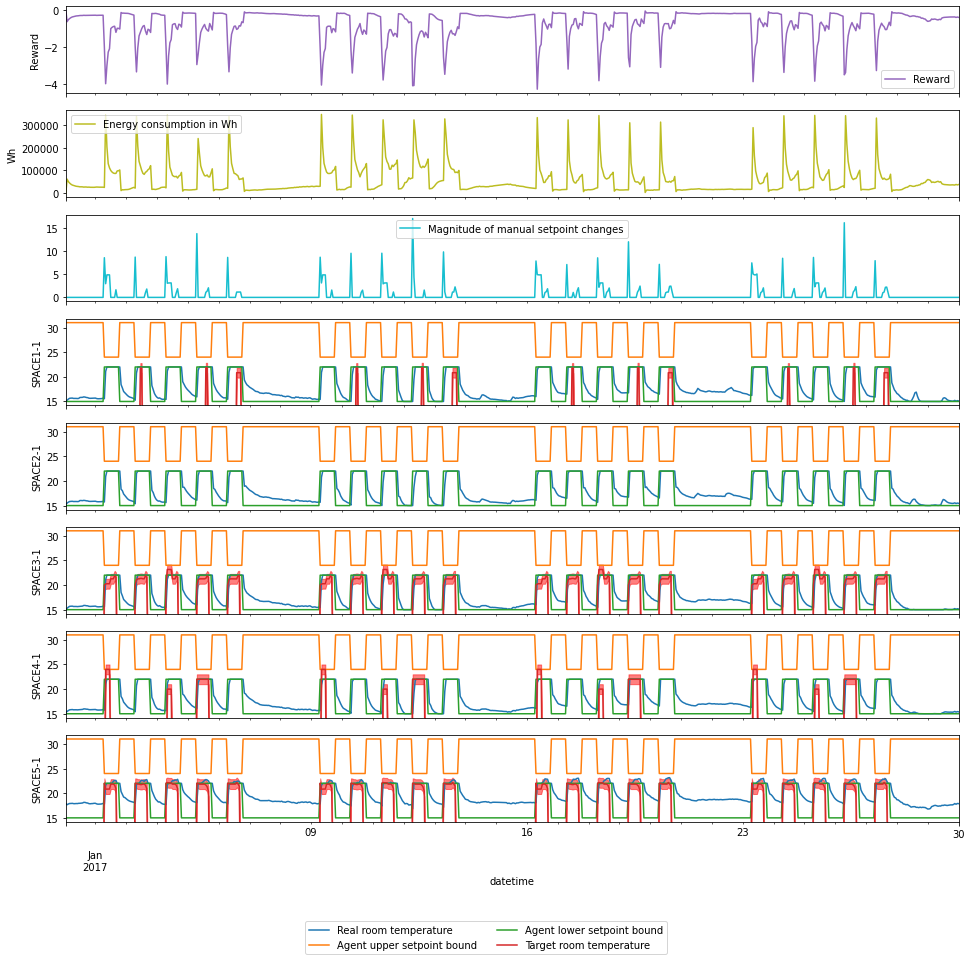

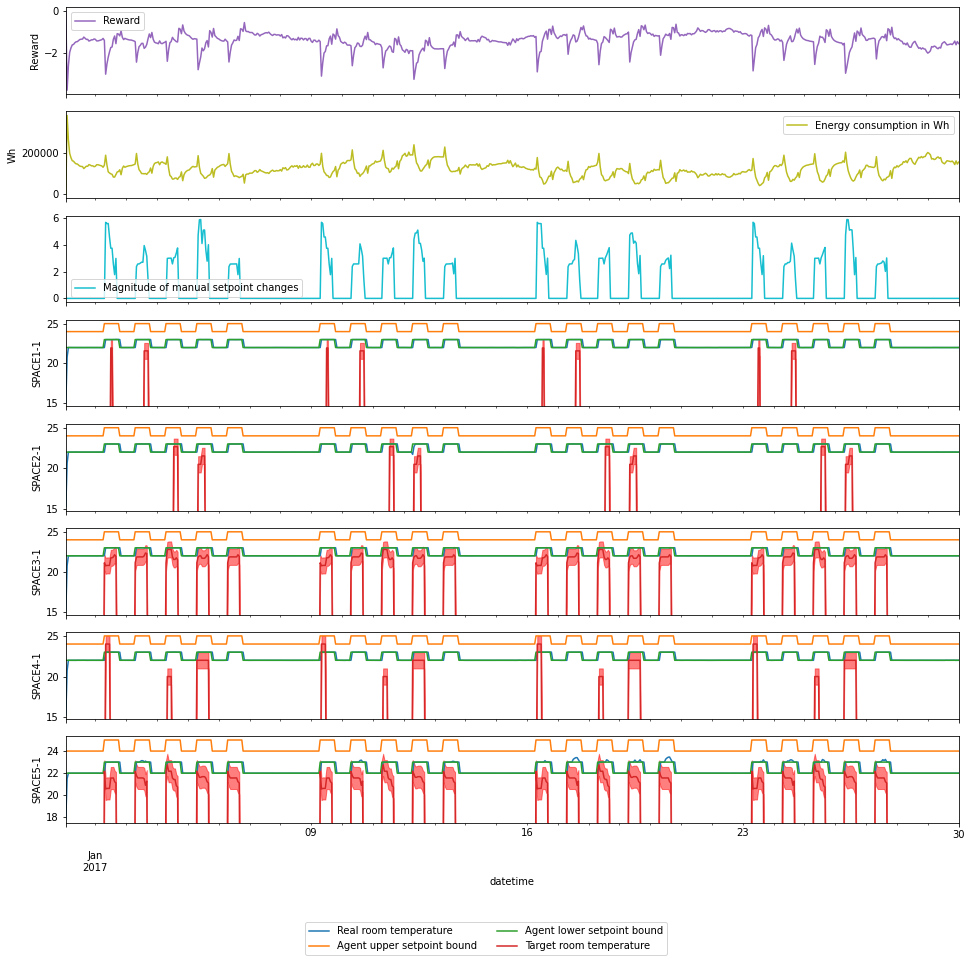

In [30]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

In [31]:
#vh.plot_q_values(q_values, fig_width)